In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [3]:
cadaver_5krare = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_5krare.rds")


In [4]:
#Subset by Country
Ita = subset_samples(cadaver_5krare, Location=="Italy")
Fin = subset_samples(cadaver_5krare, Location=="Finland")
USA = subset_samples(cadaver_5krare, Location=="USA")
USA = subset_samples(USA, Case_no!="C41")


In [5]:
#Subset by Organ (by country)

liver.fin = subset_samples(Fin, Organ=="Liver") #Finland only includes liver anyway

brain.ita = subset_samples(Ita, Organ=="Brain")
heart.ita = subset_samples(Ita, Organ=="Heart")
liver.ita = subset_samples(Ita, Organ=="Liver")
prostate.ita = subset_samples(Ita, Organ=="Prostate")
spleen.ita = subset_samples(Ita, Organ=="Spleen")
uterus.ita = subset_samples(Ita, Organ=="Uterus")

blood.usa = subset_samples(USA, Organ=="Blood")
brain.usa = subset_samples(USA, Organ=="Brain")
heart.usa = subset_samples(USA, Organ=="Heart")
liver.usa = subset_samples(USA, Organ=="Liver")
spleen.usa = subset_samples(USA, Organ=="Spleen")


In [6]:
sample_tab = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/final_biom/all_cadaver_metadata.csv")
colnames(sample_tab)[1] <- "SampleID"

### Estimate Shannon Diversity for all organs by country

In [7]:
#Italy by Organ

sha = estimate_richness(na.omit(Ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
dfsha.ita = merge(sha, sample_tab, on="SampleID")

#Finland by Organ

sha = estimate_richness(na.omit(Fin), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
dfsha.fin = merge(sha, sample_tab, on="SampleID")

#USA by Organ

sha = estimate_richness(na.omit(USA), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
dfsha.usa = merge(sha, sample_tab, on="SampleID")



### Check normality of data

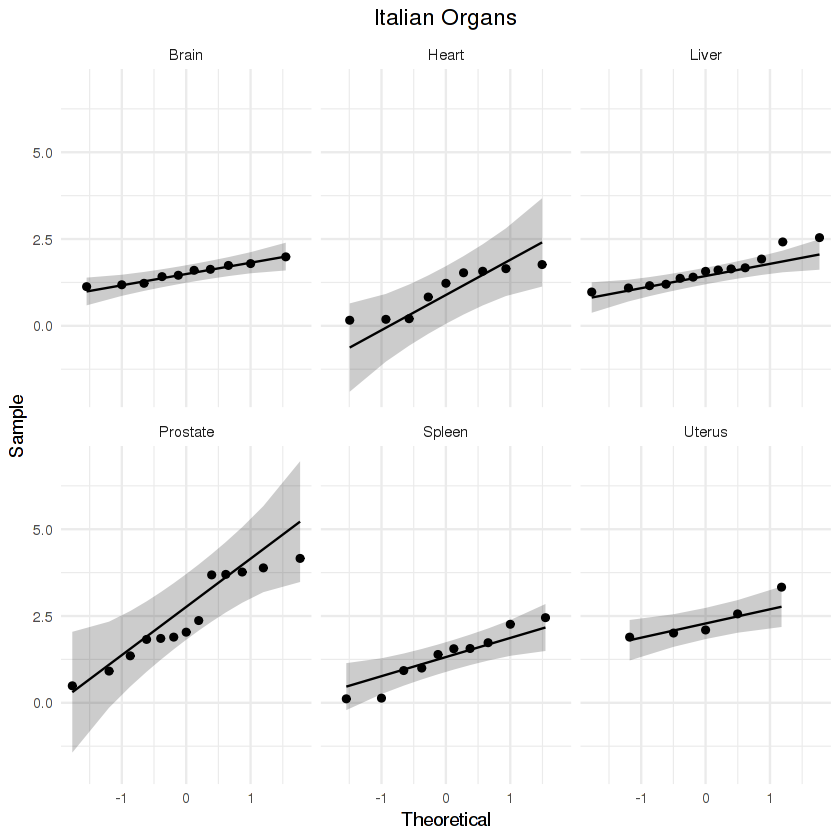

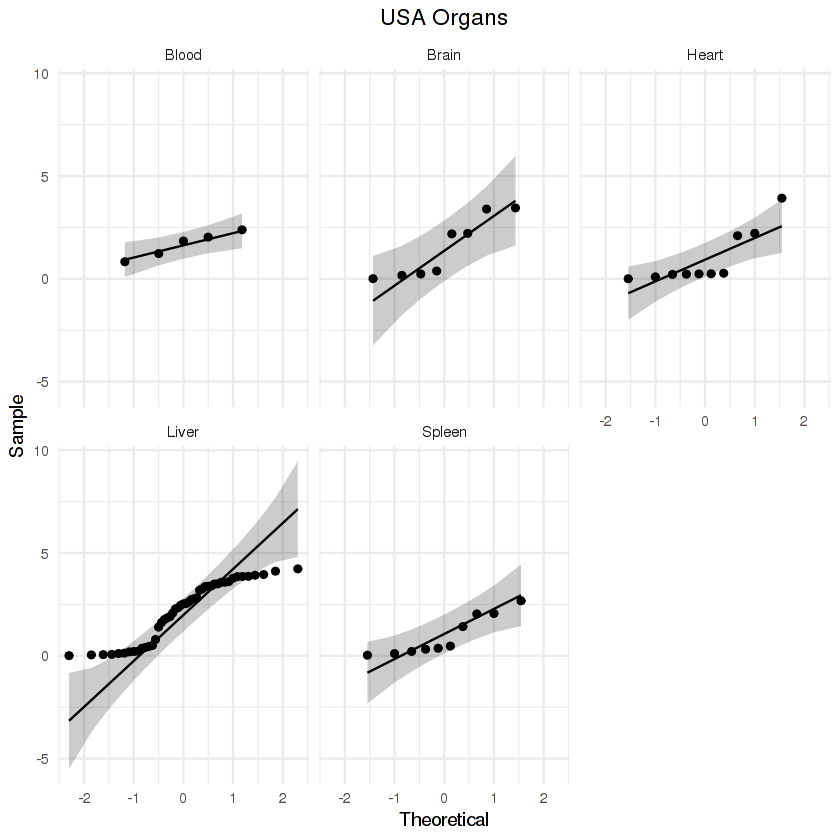

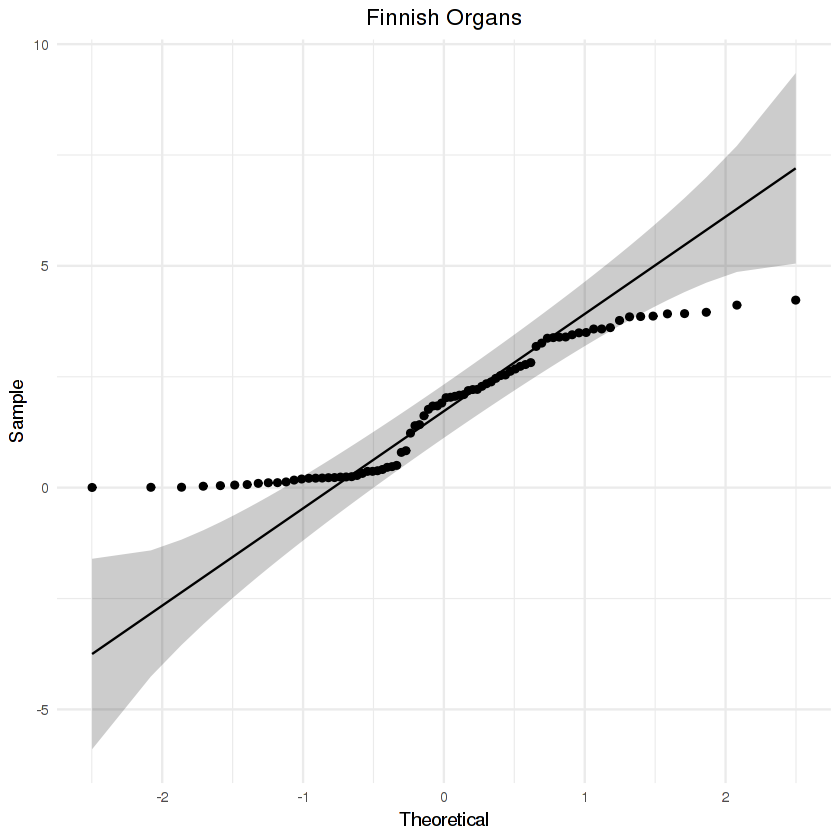

In [25]:
#Q-Q plots

p1 = ggqqplot(dfsha.ita, x = "Shannon") + ggtitle("Italian Organs")
p1 = p1 + facet_wrap("Organ") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

p2 = ggqqplot(dfsha.usa, x = "Shannon") + ggtitle("USA Organs")
p2 = p2 + facet_wrap("Organ") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

p3 = ggqqplot(dfsha.usa, x = "Shannon") + ggtitle("Finnish Organs")
p3 = p3 + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

p1
p2
p3

### Plot linear regressions of all organs by country

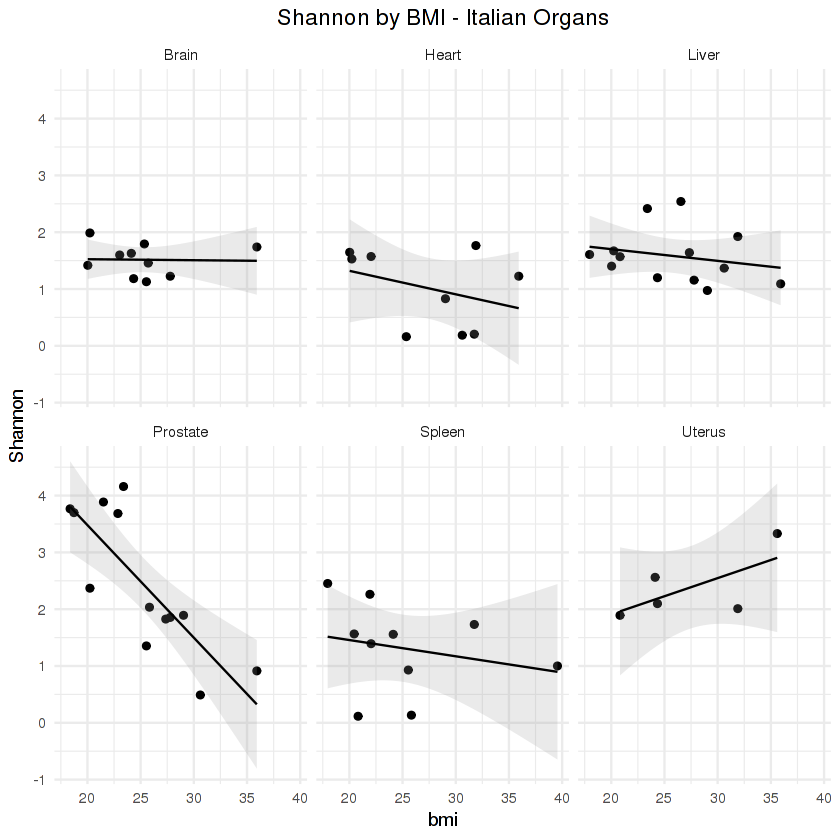

In [10]:
p = ggplot(dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by BMI - Italian Organs")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) #+
        #scale_colour_brewer(palette = "Spectral")

p2 = p + facet_wrap(~Organ)
p2


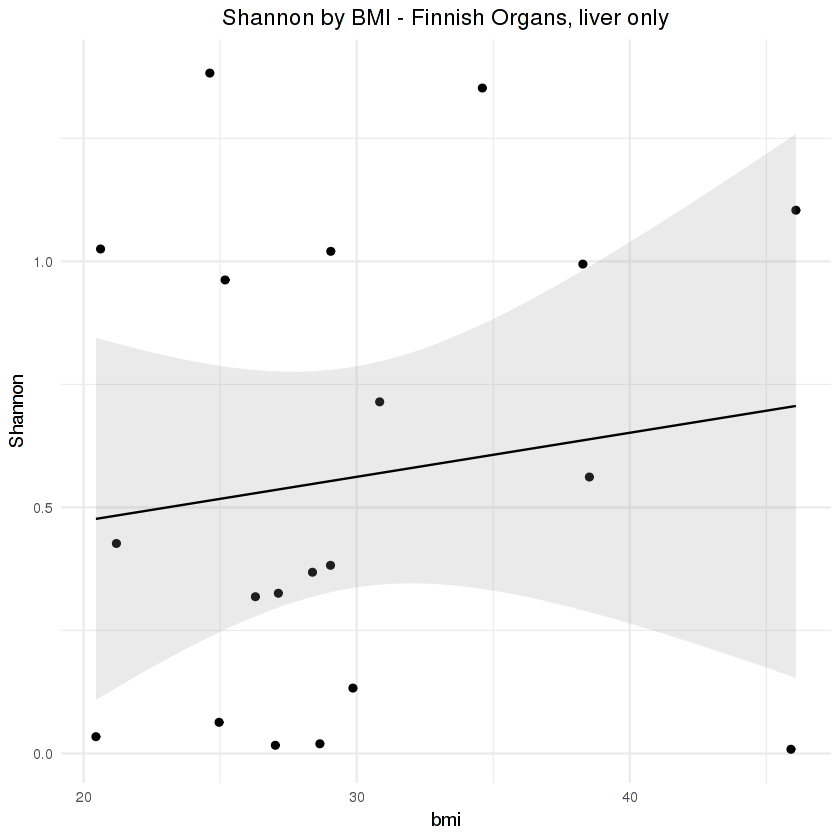

In [11]:
p = ggplot(dfsha.fin, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by BMI - Finnish Organs, liver only")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) #+
        #scale_colour_brewer(palette = "Spectral")

p
#p2 = p + facet_wrap(~Organ)
#p2


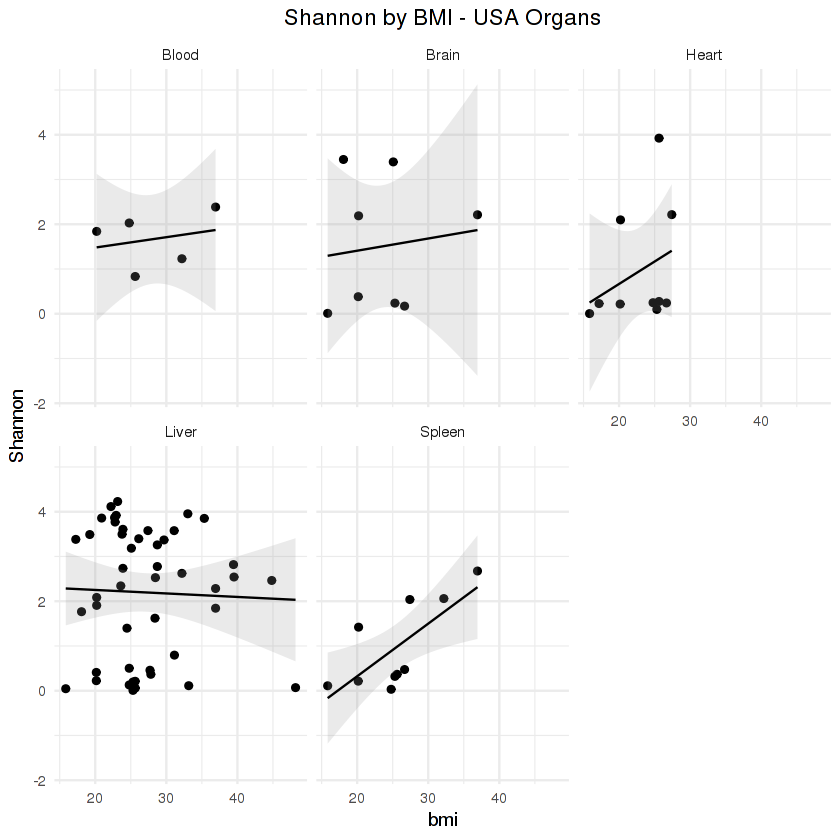

In [12]:
p = ggplot(dfsha.usa, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by BMI - USA Organs")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

p2 = p + facet_wrap(~Organ)
p2


### Repeat regressions broken down by Organ and locality

In [13]:
#######
#Italy#
#######

#brain
sha = estimate_richness(na.omit(brain.ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
brain.dfsha.ita = merge(sha, sample_tab, on="SampleID")
#heart
sha = estimate_richness(na.omit(heart.ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
heart.dfsha.ita = merge(sha, sample_tab, on="SampleID")
#liver
sha = estimate_richness(na.omit(liver.ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
liver.dfsha.ita = merge(sha, sample_tab, on="SampleID")
#prostate
sha = estimate_richness(na.omit(prostate.ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
prostate.dfsha.ita = merge(sha, sample_tab, on="SampleID")
#spleen
sha = estimate_richness(na.omit(spleen.ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
spleen.dfsha.ita = merge(sha, sample_tab, on="SampleID")
#uterus
sha = estimate_richness(na.omit(uterus.ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
uterus.dfsha.ita = merge(sha, sample_tab, on="SampleID")

#####
#USA#
#####

#blood
sha = estimate_richness(na.omit(blood.usa), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
blood.dfsha.usa = merge(sha, sample_tab, on="SampleID")
#brain
sha = estimate_richness(na.omit(brain.usa), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
brain.dfsha.usa = merge(sha, sample_tab, on="SampleID")
#heart
sha = estimate_richness(na.omit(heart.usa), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
heart.dfsha.usa = merge(sha, sample_tab, on="SampleID")
#liver
sha = estimate_richness(na.omit(liver.usa), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
liver.dfsha.usa = merge(sha, sample_tab, on="SampleID")
#spleen
sha = estimate_richness(na.omit(spleen.usa), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
spleen.dfsha.usa = merge(sha, sample_tab, on="SampleID")


#########
#Finland#
#########

#Liver only
sha = estimate_richness(na.omit(liver.fin), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
liver.dfsha.fin = merge(sha, sample_tab, on="SampleID")


### Estimate fit for each organ by country

In [14]:
#Italian Brain
p1 = ggplot(brain.dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Italian Brain")
p1 = p1 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p1b = ggplot(brain.dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Italian Brain")
p1b = p1b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ bmi, data = brain.dfsha.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,0.0005630384,0.0005630384,0.006198142,0.9391824
Residuals,8,0.7267189361,0.0908398670,NA,NA



Call:
lm(formula = Shannon ~ bmi, data = brain.dfsha.ita)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3866 -0.2415  0.0107  0.2099  0.4627 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.560283   0.574163   2.717   0.0264 *
bmi         -0.001769   0.022464  -0.079   0.9392  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3014 on 8 degrees of freedom
Multiple R-squared:  0.0007742,	Adjusted R-squared:  -0.1241 
F-statistic: 0.006198 on 1 and 8 DF,  p-value: 0.9392


In [15]:
#Italian Heart
p2 = ggplot(heart.dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Italian heart")
p2 = p2 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p2b = ggplot(heart.dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Italian heart")
p2b = p2b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ bmi, data = heart.dfsha.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,0.4502868,0.4502868,0.9743659,0.3564768
Residuals,7,3.2349319,0.4621331,NA,NA



Call:
lm(formula = Shannon ~ bmi, data = heart.dfsha.ita)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9381 -0.6300  0.2175  0.3362  0.9362 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.14782    1.17138   1.834    0.109
bmi         -0.04136    0.04190  -0.987    0.356

Residual standard error: 0.6798 on 7 degrees of freedom
Multiple R-squared:  0.1222,	Adjusted R-squared:  -0.003215 
F-statistic: 0.9744 on 1 and 7 DF,  p-value: 0.3565


In [16]:
#Italian Liver
p3 = ggplot(liver.dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Italian liver")
p3 = p3 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p3b = ggplot(liver.dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Italian liver")
p3b = p3b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ bmi, data = liver.dfsha.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,0.1438288,0.1438288,0.6044282,0.4532896
Residuals,11,2.6175431,0.2379585,NA,NA



Call:
lm(formula = Shannon ~ bmi, data = liver.dfsha.ita)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54156 -0.29897 -0.11557  0.09001  0.97369 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.11423    0.69835   3.027   0.0115 *
bmi         -0.02062    0.02652  -0.777   0.4533  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4878 on 11 degrees of freedom
Multiple R-squared:  0.05209,	Adjusted R-squared:  -0.03409 
F-statistic: 0.6044 on 1 and 11 DF,  p-value: 0.4533


In [17]:
#Italian Spleen
p4 = ggplot(spleen.dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Italian spleen")
p4 = p4 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p4b = ggplot(spleen.dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Italian spleen")
p4b = p4b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ bmi, data = spleen.dfsha.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,0.2985512,0.2985512,0.4528612,0.5199411
Residuals,8,5.2740427,0.6592553,NA,NA



Call:
lm(formula = Shannon ~ bmi, data = spleen.dfsha.ita)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3183 -0.2788  0.1117  0.5121  0.9374 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.02873    1.09288   1.856     0.10
bmi         -0.02860    0.04249  -0.673     0.52

Residual standard error: 0.8119 on 8 degrees of freedom
Multiple R-squared:  0.05357,	Adjusted R-squared:  -0.06473 
F-statistic: 0.4529 on 1 and 8 DF,  p-value: 0.5199


In [18]:
#Italian Prostate
p5 = ggplot(prostate.dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Italian prostate")
p5 = p5 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p5b = ggplot(prostate.dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Italian prostate")
p5b = p5b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ bmi, data = prostate.dfsha.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,12.029445,12.0294454,20.62878,0.0008412491
Residuals,11,6.414527,0.5831389,NA,NA



Call:
lm(formula = Shannon ~ bmi, data = prostate.dfsha.ita)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06478 -0.28972 -0.03568  0.58865  1.35150 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.44312    1.11823   6.656 3.58e-05 ***
bmi         -0.19817    0.04363  -4.542 0.000841 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7636 on 11 degrees of freedom
Multiple R-squared:  0.6522,	Adjusted R-squared:  0.6206 
F-statistic: 20.63 on 1 and 11 DF,  p-value: 0.0008412


In [19]:
#Italian Uterus
p6 = ggplot(uterus.dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Italian uterus")
p6 = p6 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p6b = ggplot(uterus.dfsha.ita, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Italian uterus")
p6b = p6b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


fit = lm(Shannon ~ bmi, data = uterus.dfsha.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,0.6136602,0.6136602,2.361586,0.2219466
Residuals,3,0.7795526,0.2598509,NA,NA



Call:
lm(formula = Shannon ~ bmi, data = uterus.dfsha.ita)

Residuals:
       1        2        3        4        5 
 0.38904  0.42709 -0.65813 -0.08827 -0.06973 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.63332    1.15812   0.547    0.623
bmi          0.06379    0.04151   1.537    0.222

Residual standard error: 0.5098 on 3 degrees of freedom
Multiple R-squared:  0.4405,	Adjusted R-squared:  0.254 
F-statistic: 2.362 on 1 and 3 DF,  p-value: 0.2219


In [20]:
#US Blood
p7 = ggplot(blood.dfsha.usa, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - USA blood")
p7 = p7 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p7b = ggplot(blood.dfsha.usa, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - USA blood")
p7b = p7b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


fit = lm(Shannon ~ bmi, data = blood.dfsha.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,0.09368218,0.09368218,0.1912757,0.6914274
Residuals,3,1.46932722,0.48977574,NA,NA



Call:
lm(formula = Shannon ~ bmi, data = blood.dfsha.usa)

Residuals:
      1       2       3       4       5 
 0.3571 -0.5323  0.4387  0.5129 -0.7765 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.01491    1.51458   0.670    0.551
bmi          0.02319    0.05303   0.437    0.691

Residual standard error: 0.6998 on 3 degrees of freedom
Multiple R-squared:  0.05994,	Adjusted R-squared:  -0.2534 
F-statistic: 0.1913 on 1 and 3 DF,  p-value: 0.6914


In [21]:
#US Brain
p8 = ggplot(brain.dfsha.usa, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - USA Brain")
p8 = p8 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p8b = ggplot(brain.dfsha.usa, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - USA Brain")
p8b = p8b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ bmi, data = brain.dfsha.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,0.2277752,0.2277752,0.09133931,0.7726839
Residuals,6,14.9623544,2.4937257,NA,NA



Call:
lm(formula = Shannon ~ bmi, data = brain.dfsha.usa)

Residuals:
   Min     1Q Median     3Q    Max 
-1.420 -1.293 -0.345  1.042  2.091 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.86309    2.19552   0.393    0.708
bmi          0.02727    0.09023   0.302    0.773

Residual standard error: 1.579 on 6 degrees of freedom
Multiple R-squared:  0.01499,	Adjusted R-squared:  -0.1492 
F-statistic: 0.09134 on 1 and 6 DF,  p-value: 0.7727


In [22]:
#US Heart
p9 = ggplot(heart.dfsha.usa, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - USA heart")
p9 = p9 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p9b = ggplot(heart.dfsha.usa, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - USA heart")
p9b = p9b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ bmi, data = heart.dfsha.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,1.565803,1.565803,0.8740788,0.377186
Residuals,8,14.331000,1.791375,NA,NA



Call:
lm(formula = Shannon ~ bmi, data = heart.dfsha.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1015 -0.9400 -0.3552  0.5658  2.6948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -1.3382     2.4883  -0.538    0.605
bmi           0.1002     0.1072   0.935    0.377

Residual standard error: 1.338 on 8 degrees of freedom
Multiple R-squared:  0.0985,	Adjusted R-squared:  -0.01419 
F-statistic: 0.8741 on 1 and 8 DF,  p-value: 0.3772


In [23]:
#US Liver
p10 = ggplot(liver.dfsha.usa, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - USA liver")
p10 = p10 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p10b = ggplot(liver.dfsha.usa, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - USA liver")
p10b = p10b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ bmi, data = liver.dfsha.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,0.1367954,0.1367954,0.06394982,0.8015103
Residuals,45,96.2597409,2.1391054,NA,NA



Call:
lm(formula = Shannon ~ bmi, data = liver.dfsha.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2394 -1.7234  0.4056  1.2538  2.0006 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.408166   0.865764   2.782  0.00788 **
bmi         -0.007811   0.030888  -0.253  0.80151   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.463 on 45 degrees of freedom
Multiple R-squared:  0.001419,	Adjusted R-squared:  -0.02077 
F-statistic: 0.06395 on 1 and 45 DF,  p-value: 0.8015


In [24]:
#US Spleen
p11 = ggplot(spleen.dfsha.usa, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - USA spleen")
p11 = p11 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p11b = ggplot(spleen.dfsha.usa, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - USA spleen")
p11b = p11b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ bmi, data = spleen.dfsha.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,4.578282,4.5782816,8.975495,0.01717837
Residuals,8,4.080695,0.5100868,NA,NA



Call:
lm(formula = Shannon ~ bmi, data = spleen.dfsha.usa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85324 -0.62416  0.07454  0.34614  1.07397 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -2.03005    1.02688  -1.977   0.0834 .
bmi          0.11764    0.03927   2.996   0.0172 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7142 on 8 degrees of freedom
Multiple R-squared:  0.5287,	Adjusted R-squared:  0.4698 
F-statistic: 8.975 on 1 and 8 DF,  p-value: 0.01718


In [25]:
#Finnish Liver (only liver from Finland)
p12 = ggplot(liver.dfsha.fin, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Finnish liver")
p12 = p12 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p12b = ggplot(liver.dfsha.fin, aes(x=bmi, y=Shannon)) + geom_point() +  ggtitle("Shannon by bmi - Finnish liver")
p12b = p12b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ bmi, data = liver.dfsha.fin)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,0.08378671,0.08378671,0.3664755,0.5524887
Residuals,18,4.11531157,0.22862842,NA,NA



Call:
lm(formula = Shannon ~ bmi, data = liver.dfsha.fin)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6960 -0.4317 -0.1240  0.4091  0.8686 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.293618   0.454001   0.647    0.526
bmi         0.008953   0.014790   0.605    0.552

Residual standard error: 0.4782 on 18 degrees of freedom
Multiple R-squared:  0.01995,	Adjusted R-squared:  -0.03449 
F-statistic: 0.3665 on 1 and 18 DF,  p-value: 0.5525


### Print plots for figures

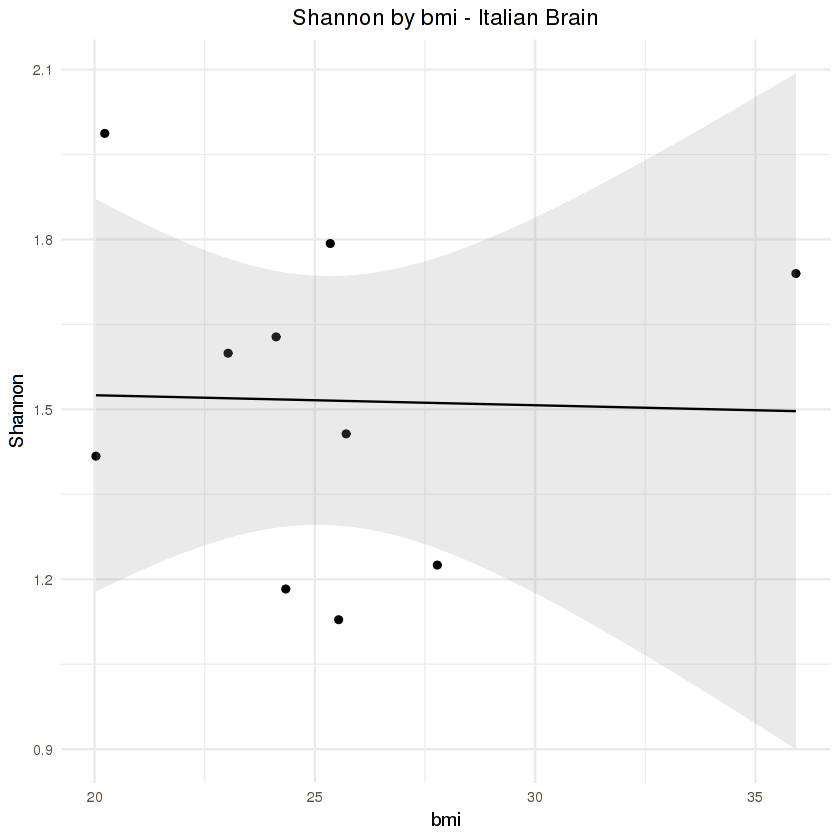

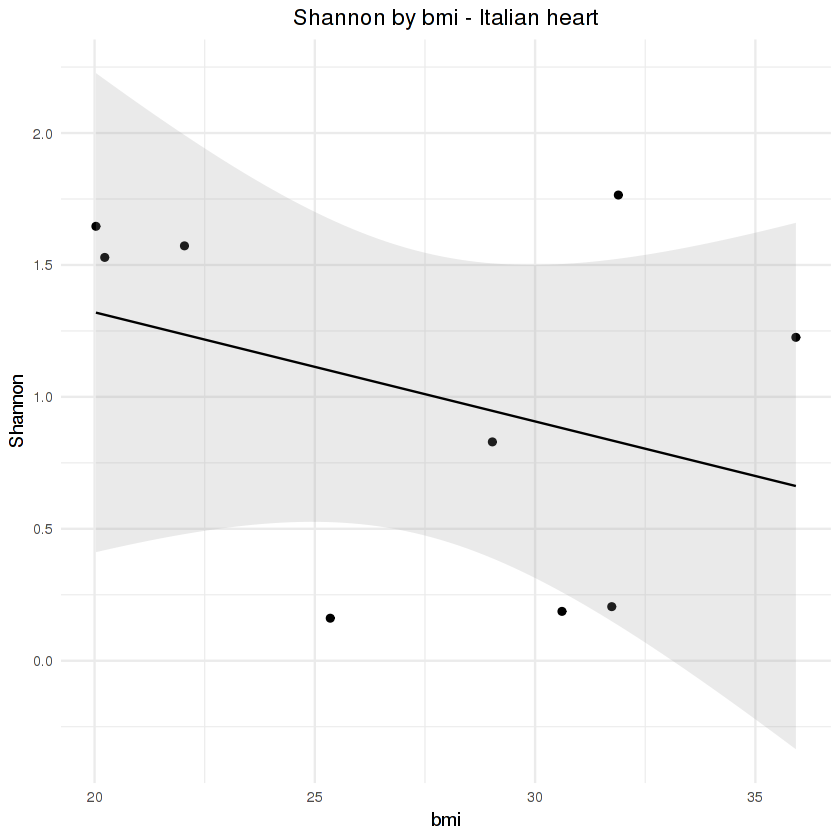

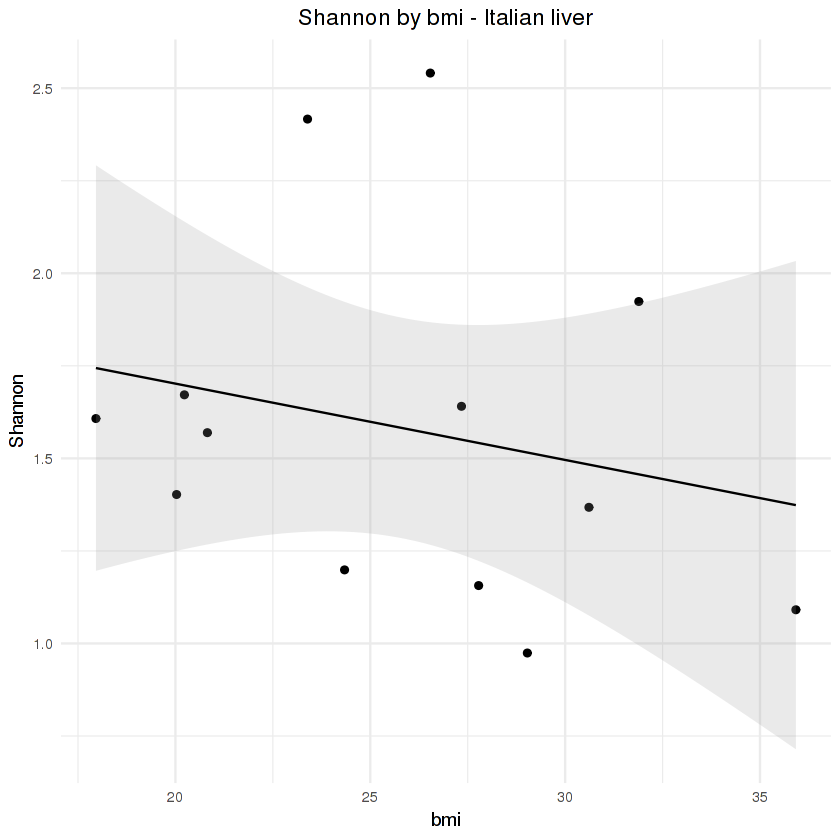

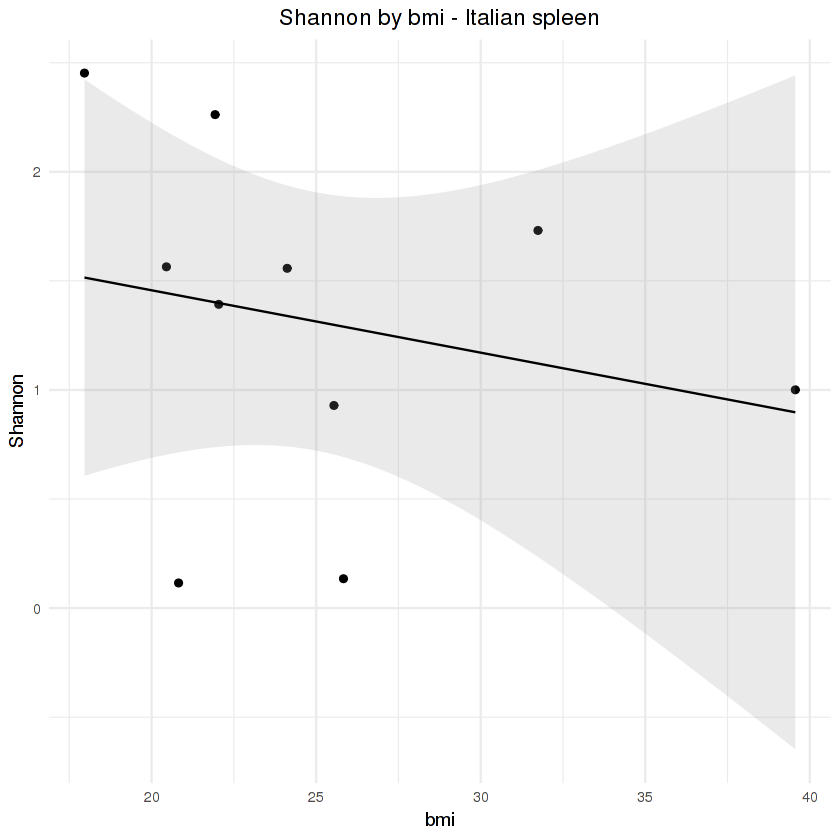

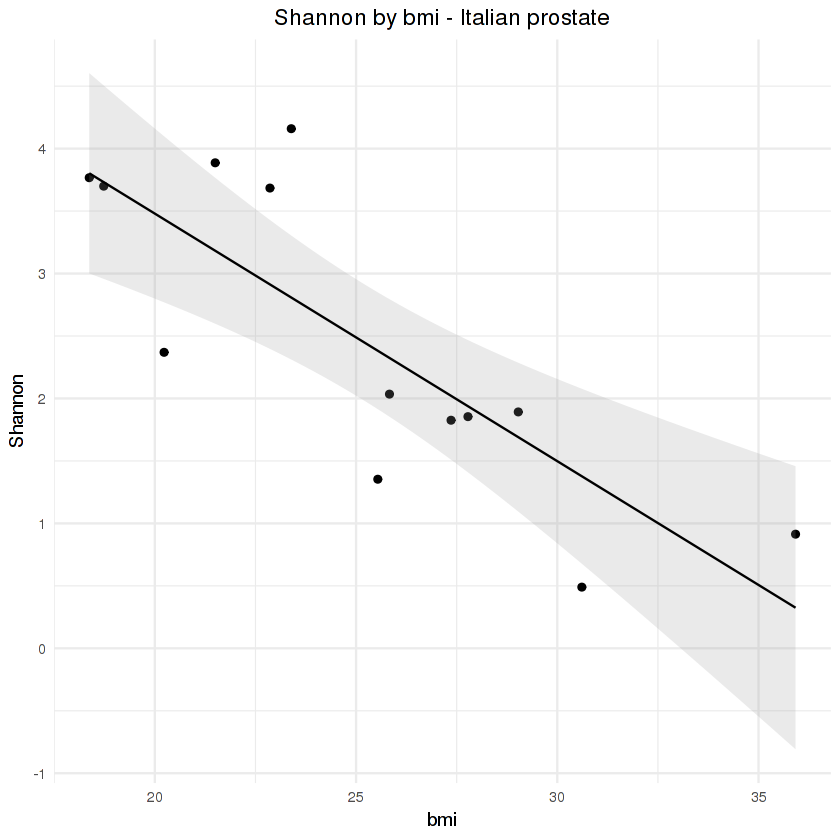

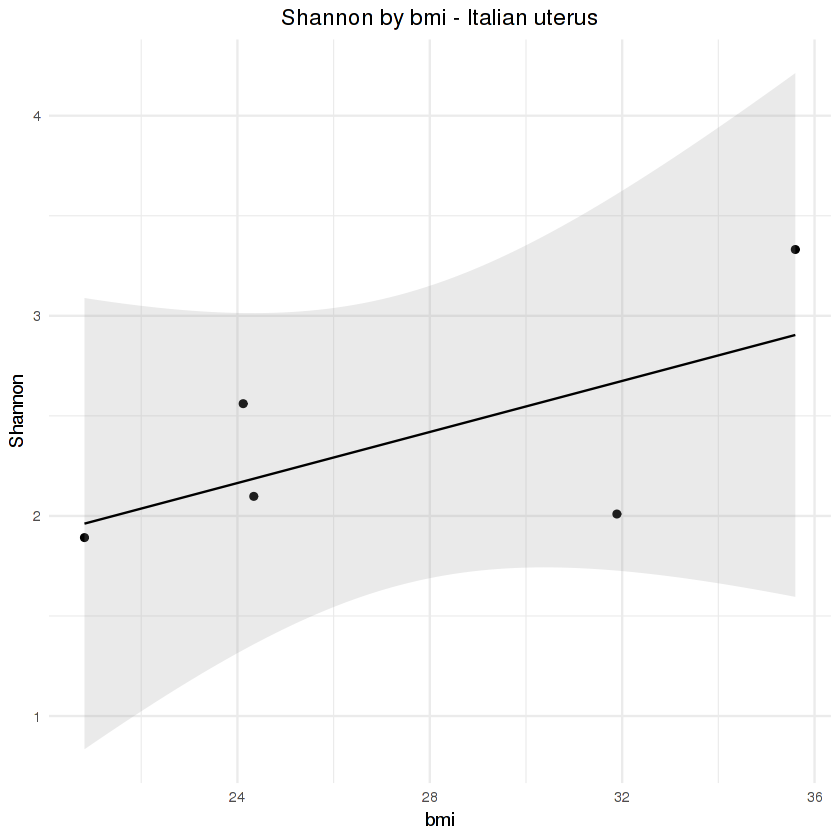

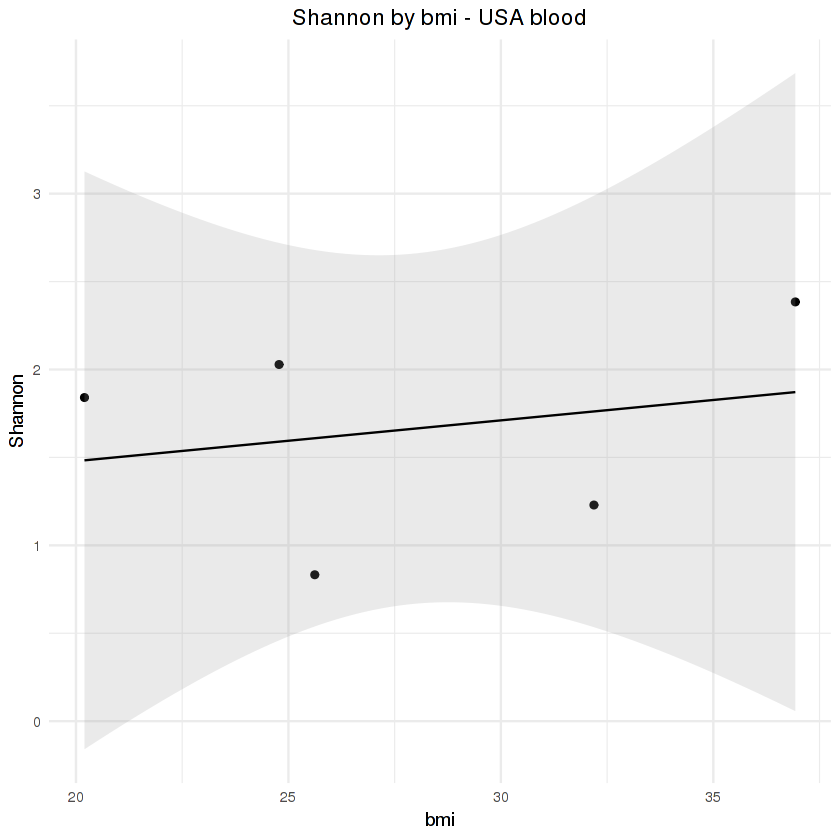

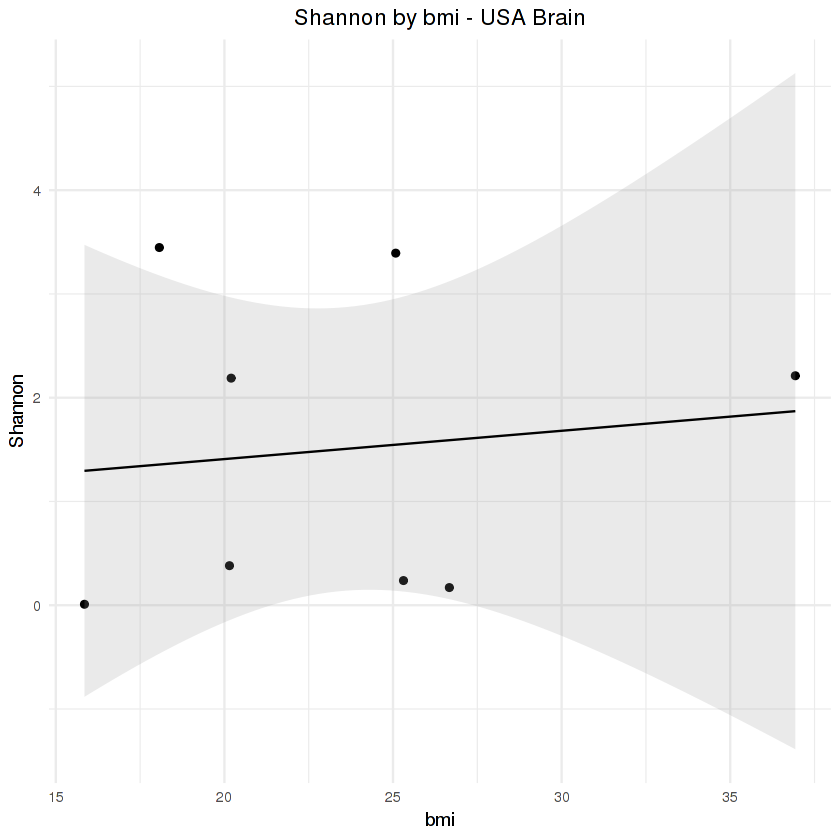

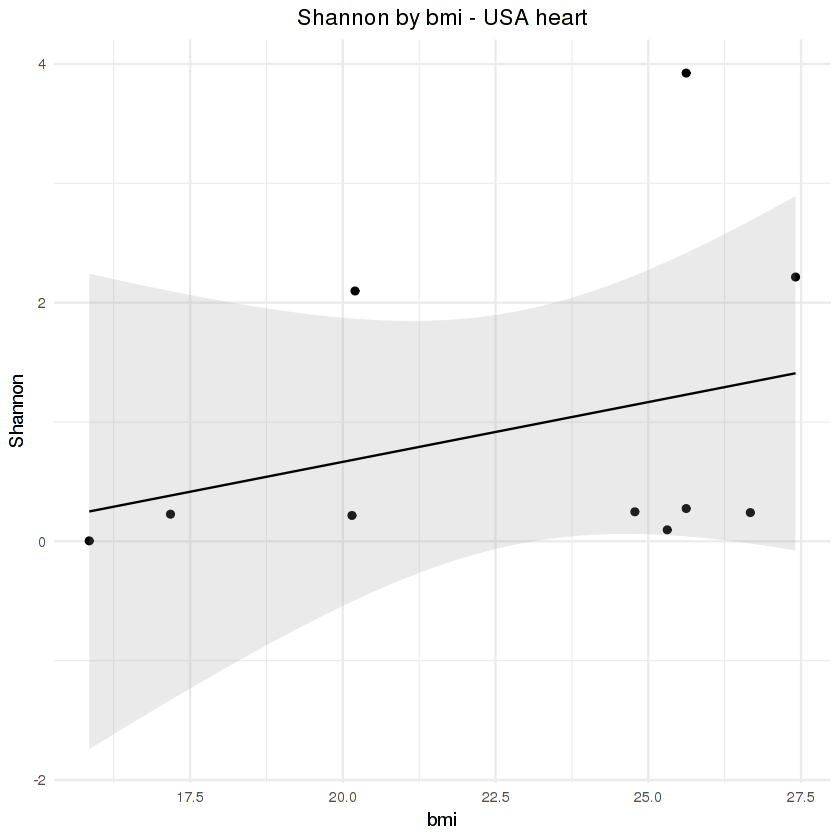

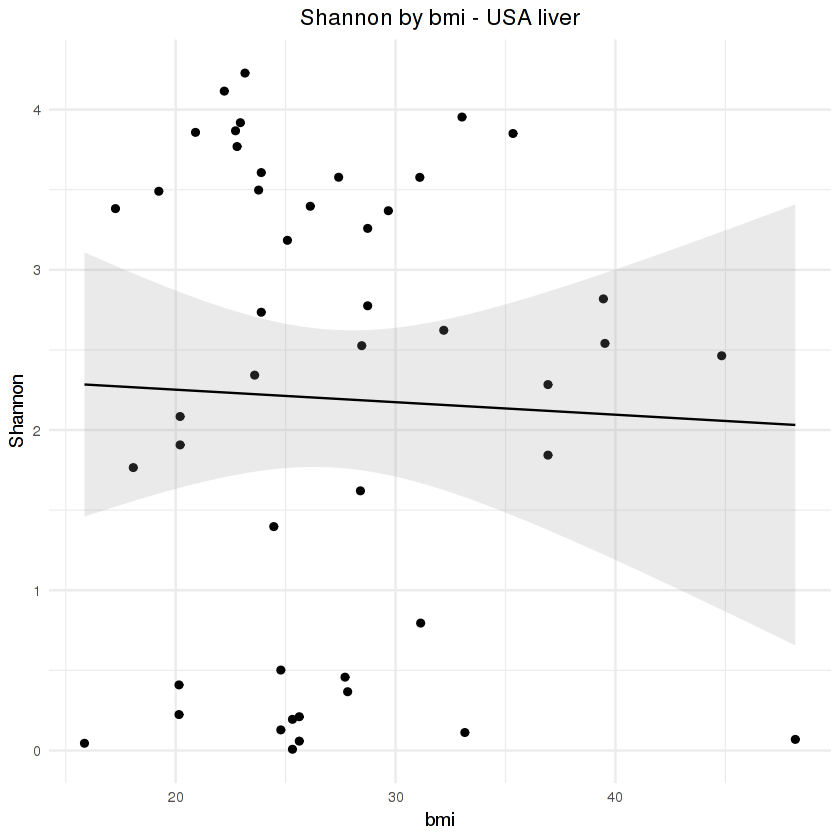

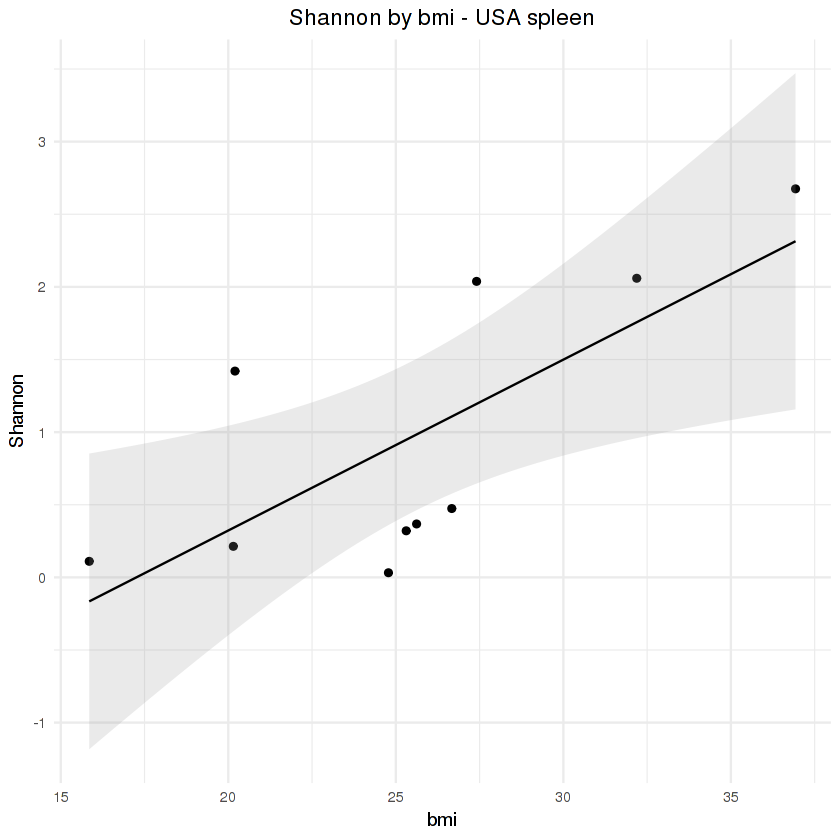

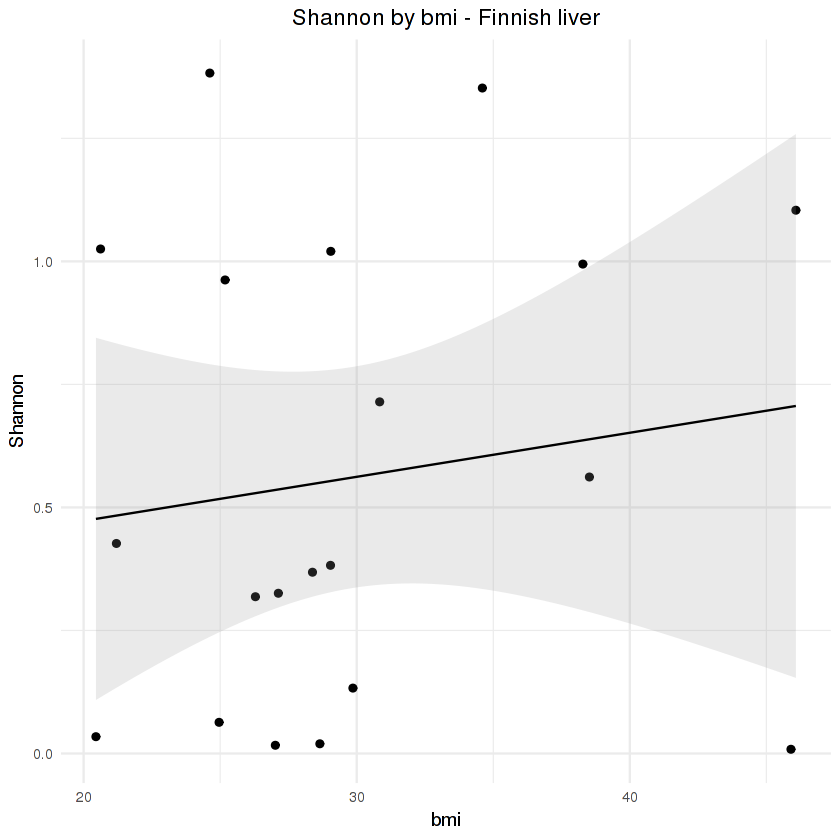

In [26]:
p1 
p2 
p3
p4
p5
p6
p7
p8
p9
p10
p11
p12

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


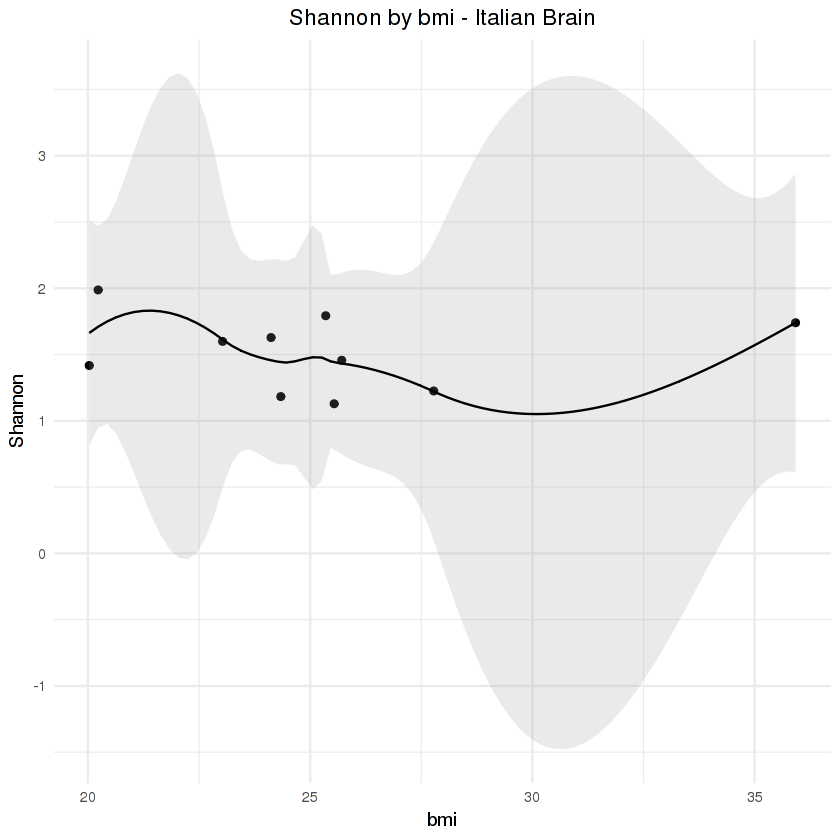

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


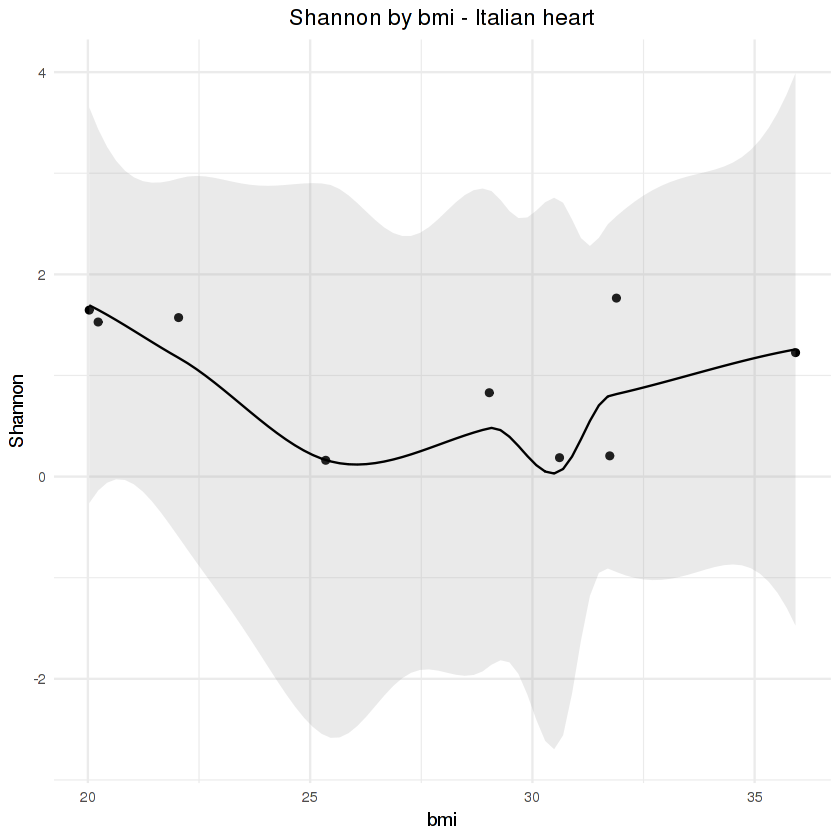

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


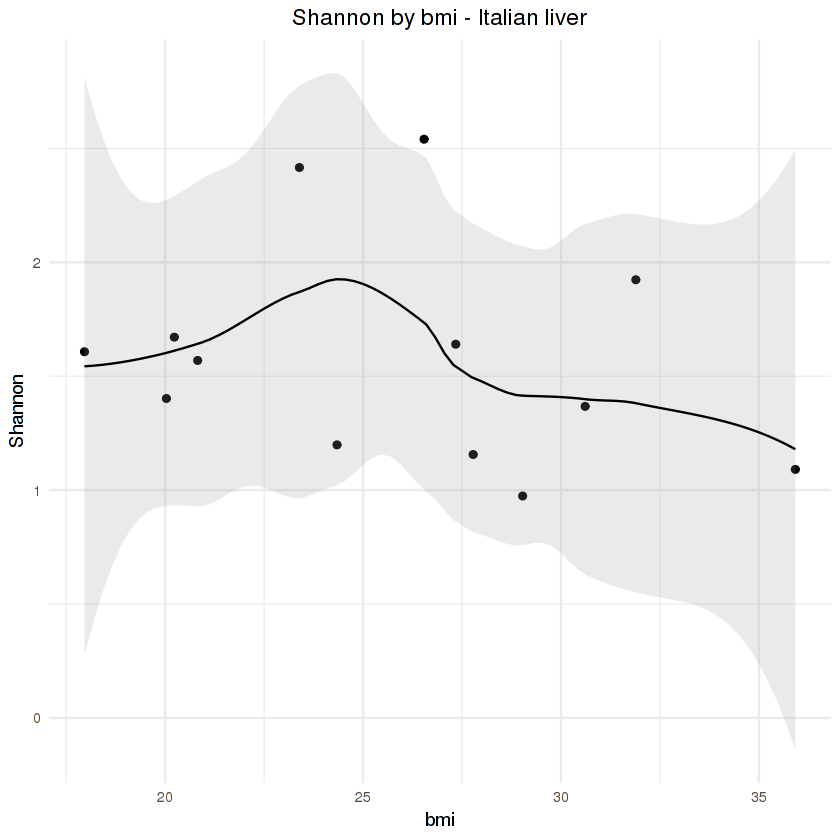

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


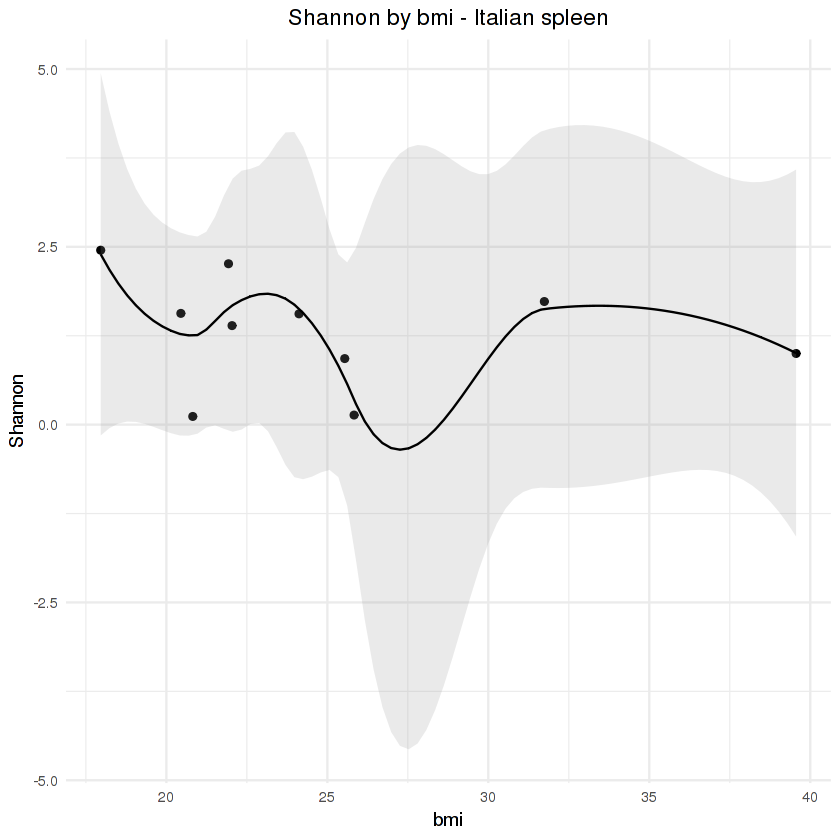

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 20.746”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 3.5939”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 128.46”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data values than degrees of freedom.”Warning message in predLoess(object$y, object$x, 

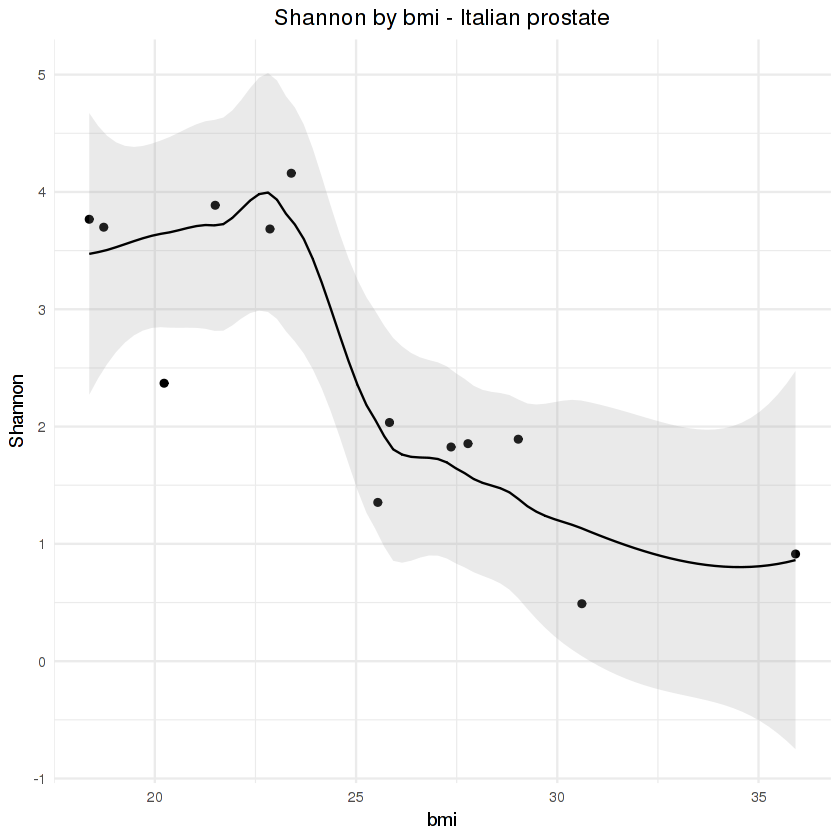

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 20.116”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 5.5037”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 129.82”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data values than degrees of freedom.”Warning message in predLoess(object$y, object$x, 

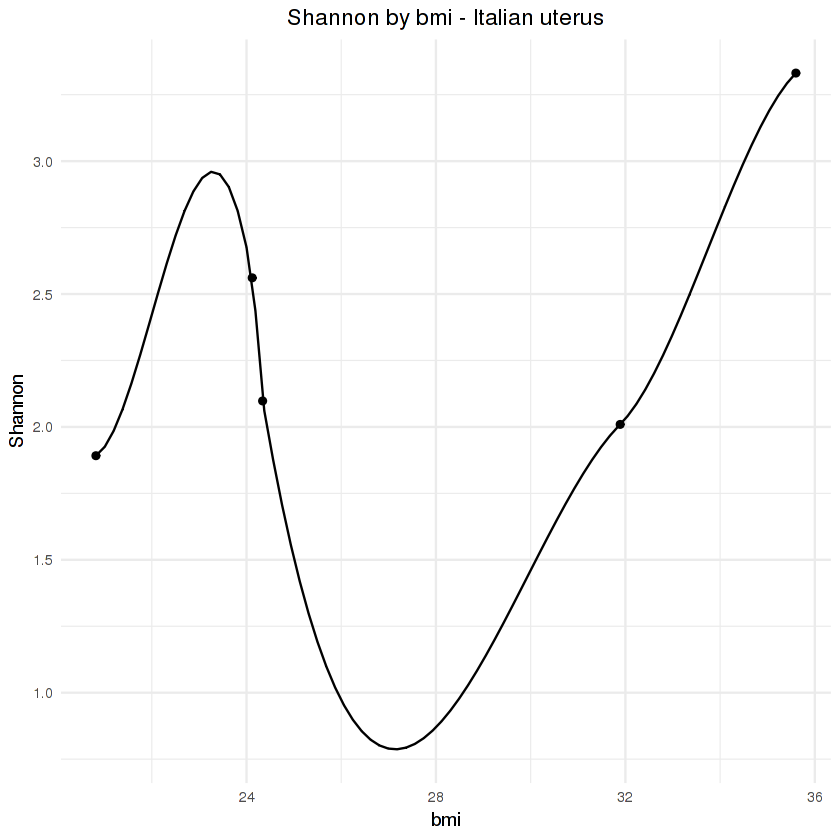

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


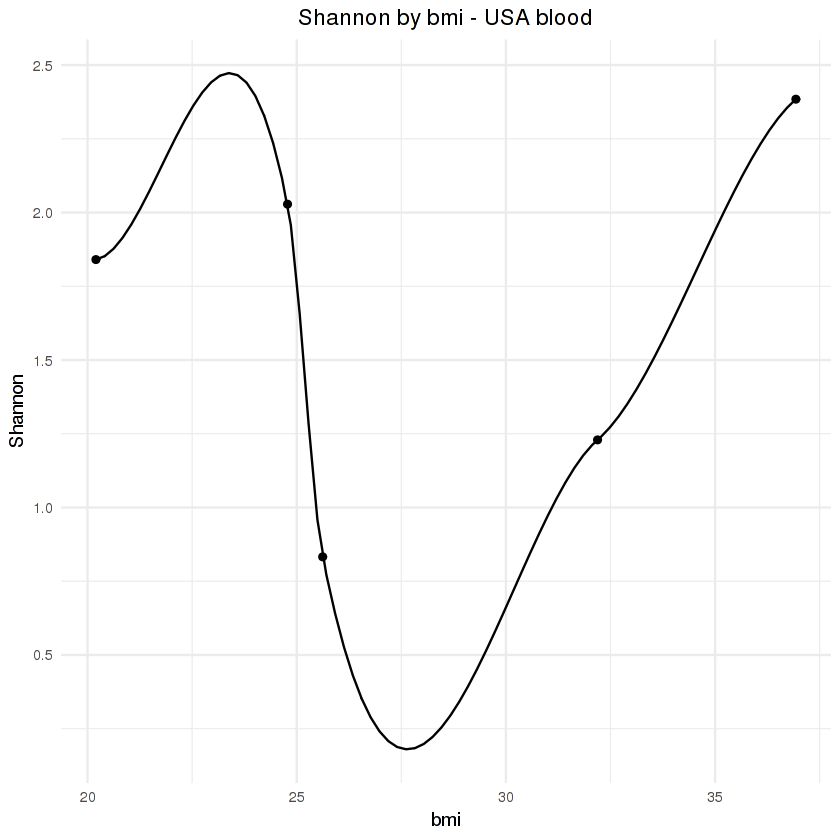

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


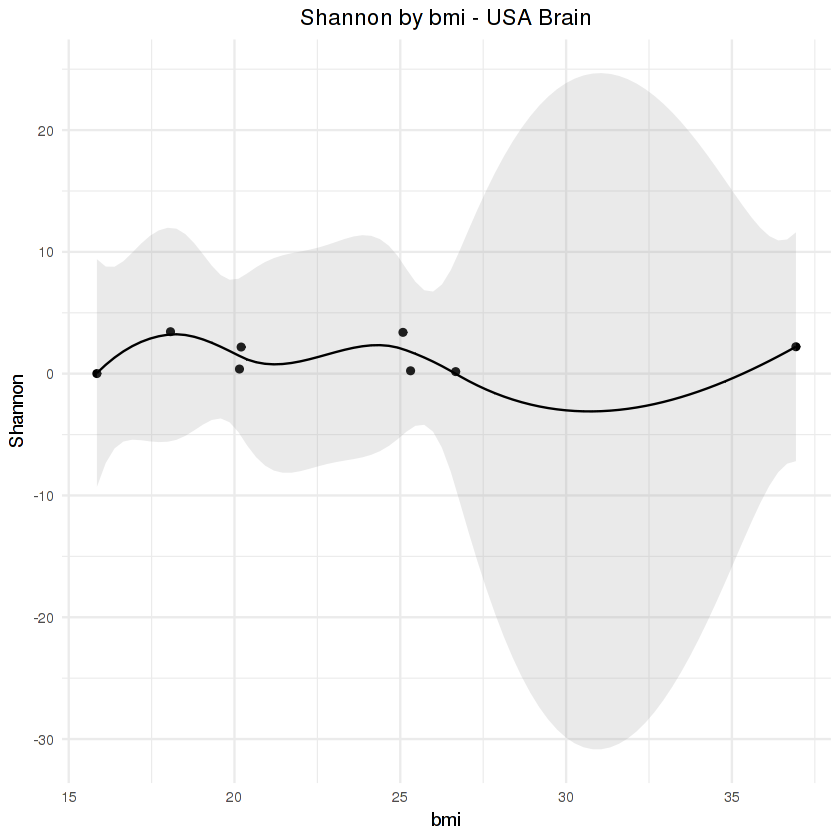

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


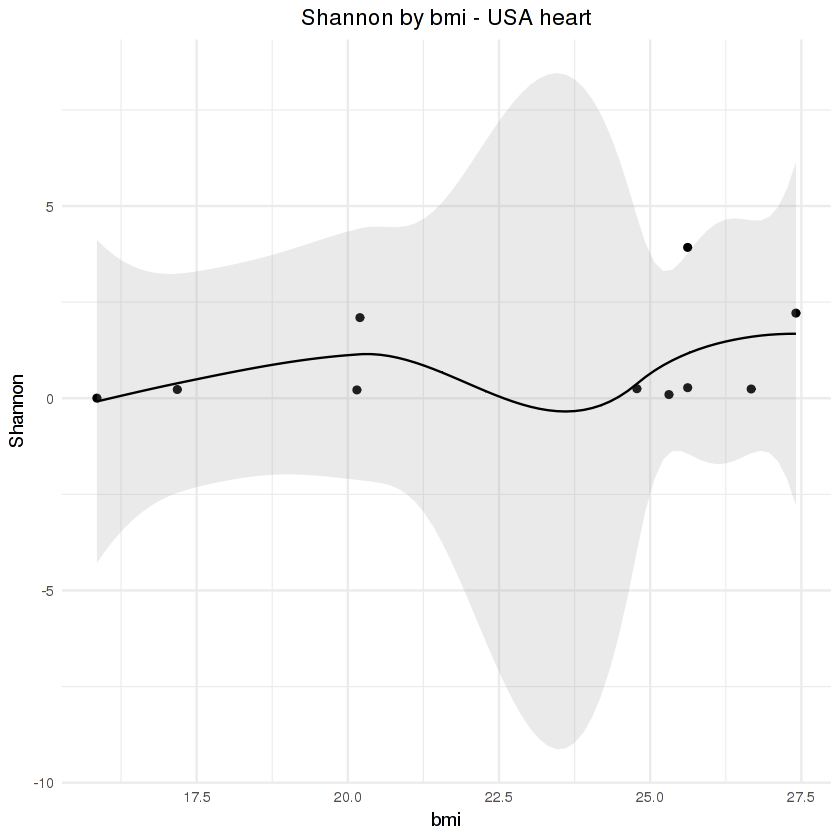

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


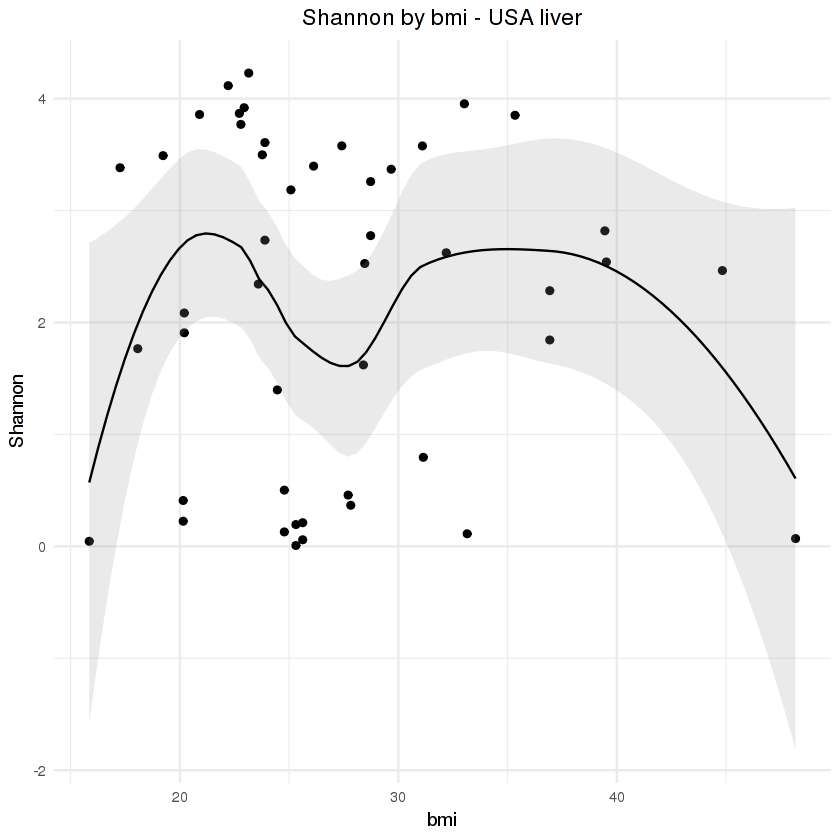

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


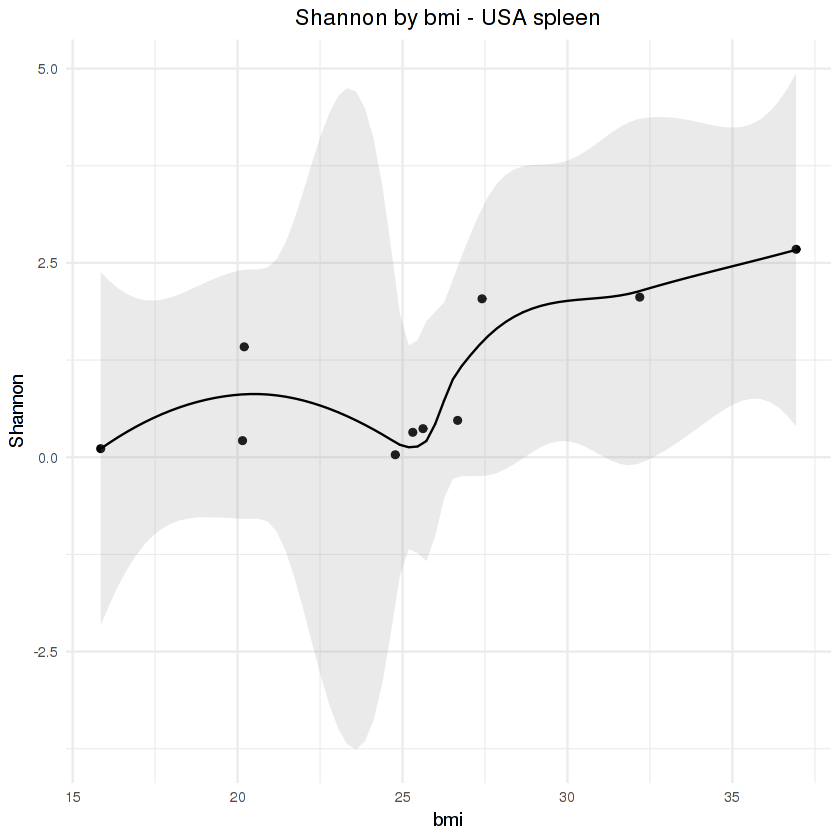

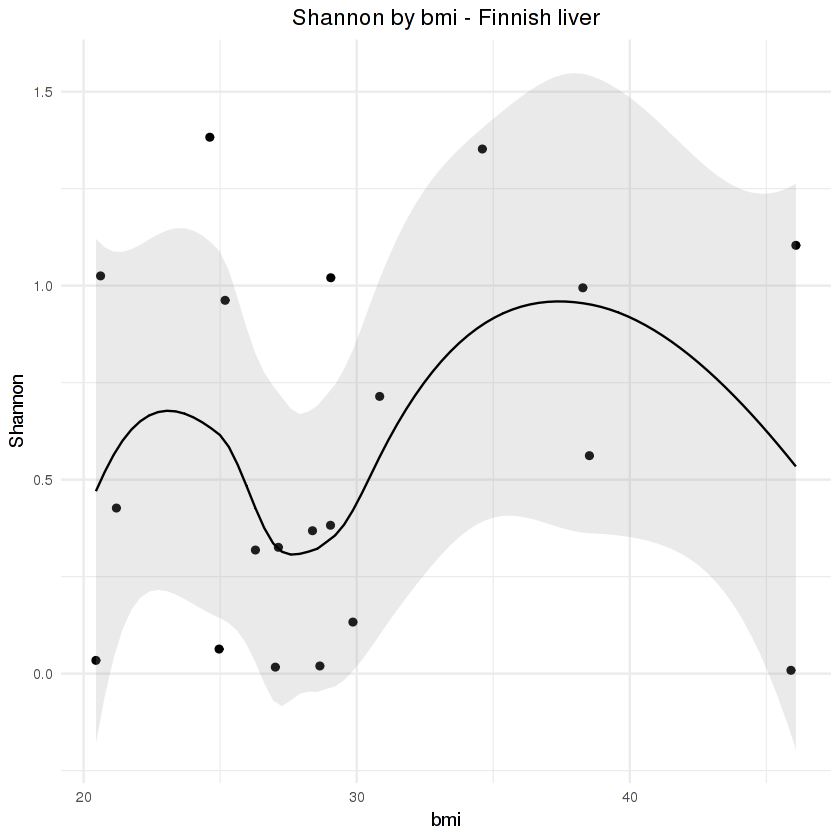

In [27]:
p1b 
p2b 
p3b
p4b
p5b
p6b
p7b
p8b
p9b
p10b
p11b
p12b